In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../data/processed/processed_heart_disease.csv")
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,69.0,Female,146.0,286.0,High,0,1,1,25.221799,0,...,0,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,0
1,46.0,Male,126.0,216.0,Low,0,0,0,29.855447,0,...,1,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,0
2,32.0,Female,122.0,293.0,High,1,1,0,24.130477,1,...,1,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,0
3,60.0,Male,166.0,242.0,Low,1,1,1,20.486289,1,...,0,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,0
4,25.0,Male,152.0,257.0,Low,1,0,0,28.144681,0,...,0,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,0


In [3]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,High LDL Cholesterol,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
count,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000
mean,49.325850,149.793433,225.288397,0.512589,0.497902,0.495489,29.057661,0.500944,0.493496,6.989240,250.388166,120.099350,7.462227,12.448643,0.200483
std,18.205866,17.578752,43.624616,0.499868,0.500022,0.500006,6.293722,0.500025,0.499984,1.752605,87.127237,23.604012,4.343354,4.318686,0.400382
min,18.000000,120.000000,150.000000,0.000000,0.000000,0.000000,18.007058,0.000000,0.000000,4.000605,100.000000,80.000000,0.003647,5.000236,0.000000
25%,34.000000,134.000000,187.000000,0.000000,0.000000,0.000000,23.656482,0.000000,0.000000,5.449181,176.000000,99.000000,3.662392,8.723334,0.000000
50%,49.000000,150.000000,225.000000,1.000000,0.000000,0.000000,29.056969,1.000000,0.000000,7.000719,250.000000,120.000000,7.458804,12.398044,0.000000
75%,65.000000,165.000000,263.000000,1.000000,1.000000,1.000000,34.477519,1.000000,1.000000,8.532454,326.000000,141.000000,11.236785,16.129292,0.000000
max,80.000000,180.000000,300.000000,1.000000,1.000000,1.000000,39.996954,1.000000,1.000000,9.999952,400.000000,160.000000,14.997087,19.999037,1.000000


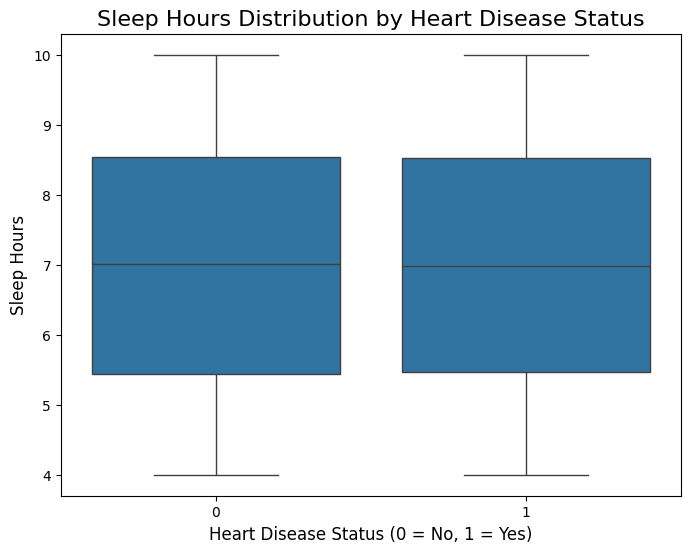

In [4]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Heart Disease Status', y='Sleep Hours', data=df)
plt.title('Sleep Hours Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Sleep Hours', fontsize=12)
plt.show()


(0.0, 100.0)

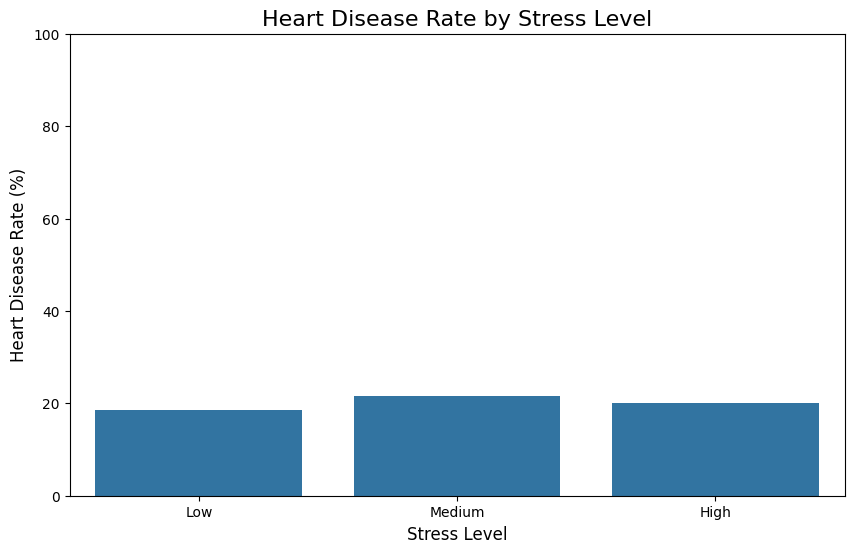

In [13]:
stress_risk = df.groupby('Stress Level')['Heart Disease Status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Stress Level', y='percent', data=stress_risk[stress_risk['Heart Disease Status'] == 1], order=['Low', 'Medium', 'High'])
plt.title('Heart Disease Rate by Stress Level', fontsize=16)
plt.xlabel('Stress Level', fontsize=12)
plt.ylabel('Heart Disease Rate (%)', fontsize=12)
plt.ylim(0, 100)

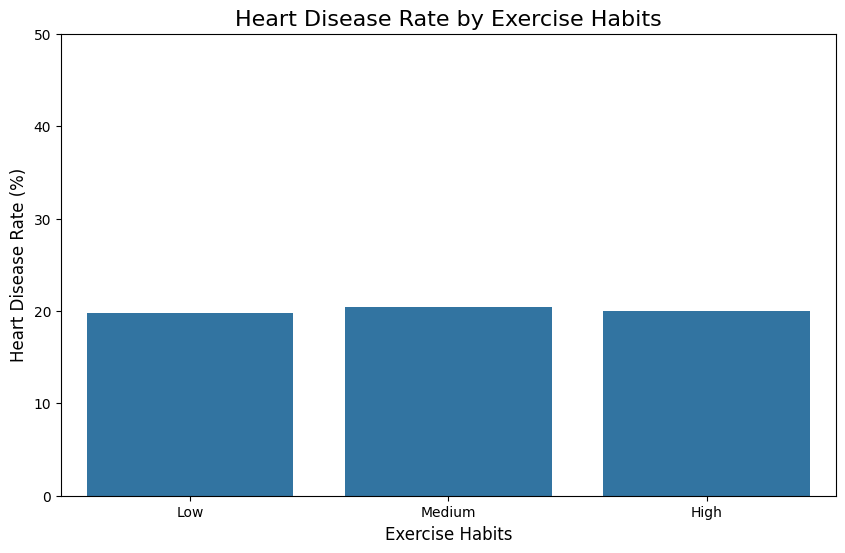

In [14]:
# Calculate the percentage of heart disease in each exercise group
exercise_risk = df.groupby('Exercise Habits')['Heart Disease Status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Create a bar plot showing the percentage of heart disease for each exercise level
plt.figure(figsize=(10, 6))
# We filter the data to only plot the 'Yes (1)' category for a cleaner chart
sns.barplot(x='Exercise Habits', y='percent', data=exercise_risk[exercise_risk['Heart Disease Status'] == 1], order=['Low', 'Medium', 'High'])
plt.title('Heart Disease Rate by Exercise Habits', fontsize=16)
plt.xlabel('Exercise Habits', fontsize=12)
plt.ylabel('Heart Disease Rate (%)', fontsize=12)
plt.ylim(0, 50) # Adjust ylim to better see the differences
plt.show()

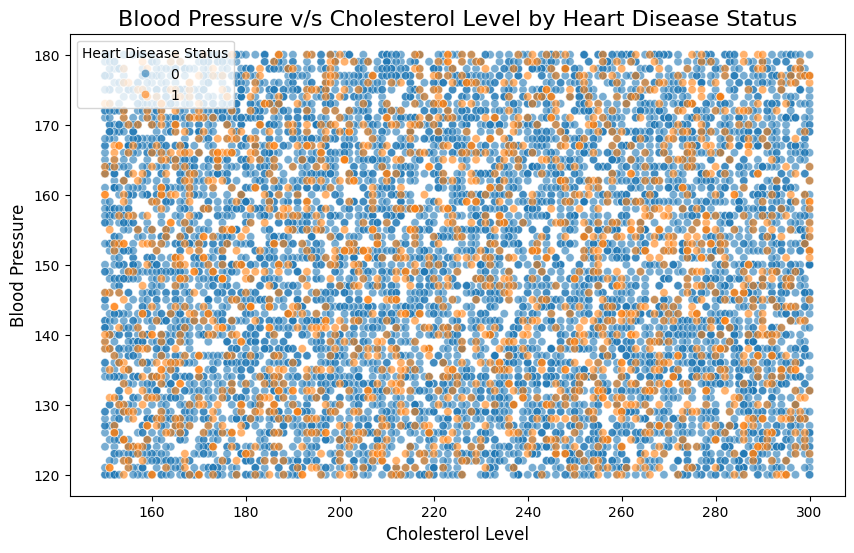

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Cholesterol Level",y="Blood Pressure",hue="Heart Disease Status",data=df,alpha=0.6)
plt.title("Blood Pressure v/s Cholesterol Level by Heart Disease Status",fontsize=16)
plt.xlabel("Cholesterol Level",fontsize=12)
plt.ylabel("Blood Pressure",fontsize=12)
plt.show()


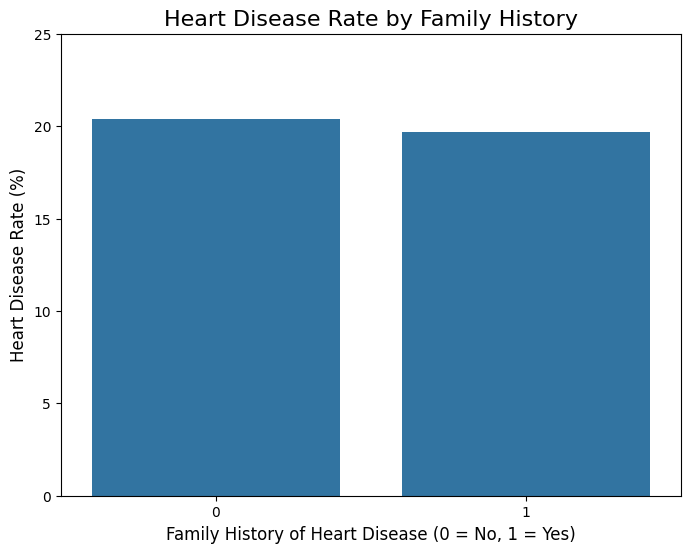

In [23]:
family_history_risk = df.groupby('Family Heart Disease')['Heart Disease Status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Family Heart Disease', y='percent', data=family_history_risk[family_history_risk['Heart Disease Status'] == 1])
plt.title('Heart Disease Rate by Family History', fontsize=16)
plt.xlabel('Family History of Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Heart Disease Rate (%)', fontsize=12)
plt.ylim(0, 25)
plt.show()